In [14]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [15]:
path = '/Users/gms/ORF2/md_apo/results/rmsf//'

filelist = os.listdir(path)

filelist.sort(reverse=True)

df = {}

i = 1

for file in filelist:
    
    print(file)

    df[i] = pd.read_table(path+file, sep=',')
    df[i] = df[i].rename(columns={"Residue":"Residue Index"})
    df[i].rename(columns={ df[i].columns[1]: "RMSD"+file }, inplace = True)
    i = i + 1

orf2_rmsf3.csv
orf2_rmsf2.csv
orf2_rmsf1.csv
orf2_nomn_rmsf3.csv
orf2_nomn_rmsf2.csv
orf2_nomn_rmsf1.csv


In [16]:
df1 = df[1]
df2 = df[2]
df3 = df[3]
df4 = df[4]
df5 = df[5]
df6 = df[6]

data_frames = [df1,df2,df3,df4,df5,df6]

In [17]:
merged = reduce(lambda  left,right: pd.merge(left,right,on=['Residue Index'],
                                            how='outer'), data_frames)

merged = merged.dropna()

In [18]:
merged

,Residue Index,RMSDorf2_rmsf3.csv,RMSDorf2_rmsf2.csv,RMSDorf2_rmsf1.csv,RMSDorf2_nomn_rmsf3.csv,RMSDorf2_nomn_rmsf2.csv,RMSDorf2_nomn_rmsf1.csv
0,6.0,0.117,0.236,0.131,0.194,0.234,0.256
1,7.0,0.074,0.125,0.076,0.093,0.138,0.137
2,8.0,0.048,0.059,0.052,0.055,0.072,0.062
3,9.0,0.041,0.043,0.042,0.046,0.050,0.045
4,10.0,0.042,0.040,0.040,0.047,0.045,0.045
...,...,...,...,...,...,...,...
228,234.0,0.039,0.037,0.039,0.053,0.048,0.051
229,235.0,0.039,0.038,0.038,0.046,0.043,0.045
230,236.0,0.040,0.038,0.040,0.043,0.041,0.040
231,237.0,0.052,0.052,0.054,0.053,0.054,0.056


In [19]:
merged.rename(columns={ merged.columns[1]:"ORF2 En"}, inplace = True)
merged.rename(columns={ merged.columns[2]:"ORF2 En"}, inplace = True)
merged.rename(columns={ merged.columns[3]:"ORF2 En"}, inplace = True)
merged.rename(columns={ merged.columns[4]:"ORF2 En no Mn2+"}, inplace = True)
merged.rename(columns={ merged.columns[5]:"ORF2 En no Mn2+"}, inplace = True)
merged.rename(columns={ merged.columns[6]:"ORF2 En no Mn2+"}, inplace = True)

In [20]:
sns.set(style="darkgrid")

In [21]:
merged = merged.set_index('Residue Index')

In [22]:
#merged = merged.set_index('Residue Index')

sns.set(style="darkgrid")
from matplotlib import pyplot

mergedroll = merged.rolling(1).mean()

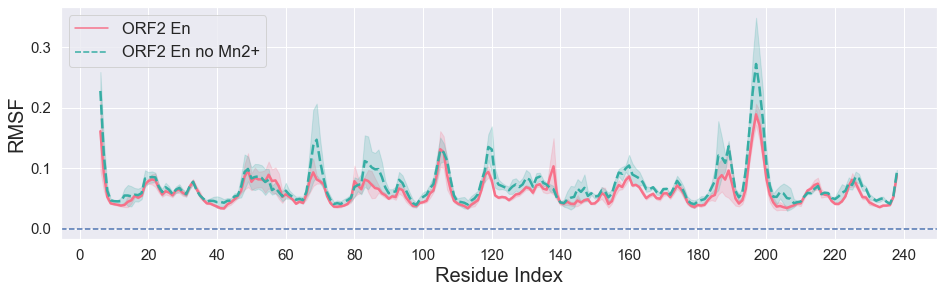

In [23]:

from matplotlib import pyplot
import matplotlib.ticker as ticker

a4_dims = (15.7, 4.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

with sns.plotting_context("notebook",font_scale=1.5):
    g = sns.lineplot(data=merged, palette="husl", linewidth=2.5, ci="sd")

g.set_xlabel("Residue Index",fontsize=20)
g.set_ylabel("RMSF",fontsize=20)
g.tick_params(labelsize=15)
#g.set(ylim = (-0.03,0.03))

g.xaxis.set_major_locator(ticker.MultipleLocator(20))
g.xaxis.set_major_formatter(ticker.ScalarFormatter())


g.axhline(0, ls='--')

plt.show()

